In [139]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


C:\Users\hugol\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
from scipy.stats import norm


### Bitcoin

In [96]:
BTC_Ticker = yf.Ticker("BTC-USD")
btc_data = BTC_Ticker.history(period="max")

In [97]:
log_returns_bitcoin = np.log(btc_data["Close"]/btc_data["Close"].shift(1)).dropna()
btc_data["log_returns"] = log_returns_bitcoin


In [98]:
m, std = stats.norm.fit(log_returns_bitcoin)
x = np.linspace(-0.5, 0.5, 1000)
p = stats.norm.pdf(x, m, std)

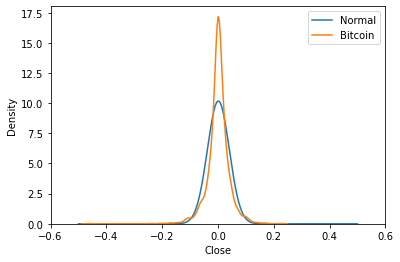

In [99]:
fig, ax = plt.subplots()
ax.plot(x, p, label= 'Normal')

sns.kdeplot(log_returns_bitcoin, ax= ax, label= 'Bitcoin')
plt.xlim(-0.6, 0.6)
ax.legend()



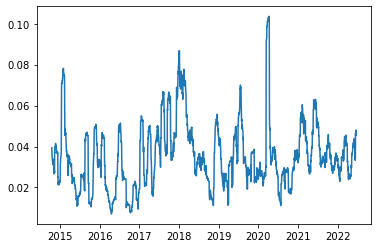

In [100]:
volatility_btc = btc_data["log_returns"].rolling(30).std()

fig, ax = plt.subplots()

ax.plot(volatility_btc)


In [101]:
volatility_btc = btc_data["log_returns"].rolling(90).std()

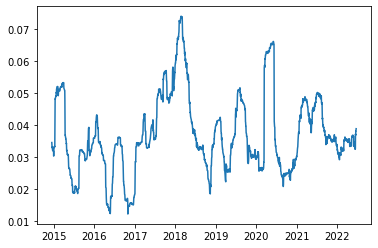

In [102]:
fig, ax = plt.subplots()

ax.plot(volatility_btc)

In [154]:
mean = log_returns_bitcoin.mean()
std = log_returns_bitcoin.std()
min_ = log_returns_bitcoin.min()
max_ = log_returns_bitcoin.max()
print(f"The mean log_returns is {mean:.5f}, the std is {std:.5f} and we have {min_:.5f} as minimum and {max_:.5f} as maximum")
print(f"Using the Jarque-Bera test we can test for normality, here we have a p-value of {stats.jarque_bera(log_returns_bitcoin)[1]} indicating that we surely reject that the returns follow a normal distribution")
stationarity = sm.tsa.stattools.adfuller(btc_data["Close"])
print(f"The ADF stat is {stationarity[0]} and critical values are for 5%: {stationarity[4]['5%']} and for 10%: {stationarity[4]['10%']}")

The mean log_returns is 0.00133, the std is 0.03921 and we have -0.46473 as minimum and 0.22512 as maximum
Using the Jarque-Bera test we can test for normality, here we have a p-value of 0.0 indicating that we surely reject that the returns follow a normal distribution
The ADF stat is -1.6683152971818205 and critical values are for 5%: -2.862571317788273 and for 10%: -2.5673190020624705


### ETH

In [12]:
eth_Ticker = yf.Ticker("ETH-USD")
eth_data = eth_Ticker.history(period="max")

In [91]:
log_returns_eth = np.log(eth_data["Close"]/eth_data["Close"].shift(1)).dropna()
eth_data["log_returns"] = log_returns_eth

In [92]:
m, std = stats.norm.fit(log_returns_eth)
x = np.linspace(-0.5, 0.5, 1000)
p = stats.norm.pdf(x, m, std)

(-0.6, 0.6)

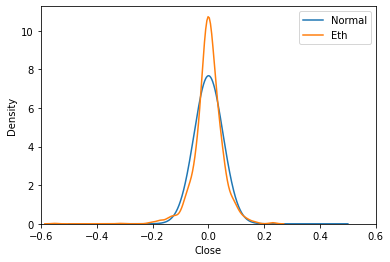

In [93]:
fig, ax = plt.subplots()
ax.plot(x, p, label= 'Normal')

sns.kdeplot(log_returns_eth, ax= ax, label= 'Eth')

ax.legend()
plt.xlim(-0.6, 0.6)


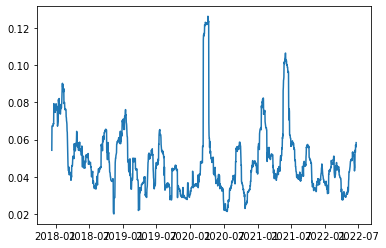

In [94]:
volatility_btc = eth_data["log_returns"].rolling(30).std()

fig, ax = plt.subplots()

ax.plot(volatility_btc)


In [153]:
mean = log_returns_eth.mean()
std = log_returns_eth.std()
min_ = log_returns_eth.min()
max_ = log_returns_eth.max()
print(f"The mean log_returns is {mean:.5f}, the std is {std:.5f} and we have {min_:.5f} as minimum and {max_:.5f} as maximum")
print(f"Using the Jarque-Bera test we can test for normality, here we have a p-value of {stats.jarque_bera(log_returns_eth)[1]} indicating that we surely reject that the returns follow a normal distribution")
stationarity = sm.tsa.stattools.adfuller(eth_data["Close"])
print(f"The ADF stat is {stationarity[0]} and critical values are for 5%: {stationarity[4]['5%']} and for 10%: {stationarity[4]['10%']}")

The mean log_returns is 0.00072, the std is 0.05202 and we have -0.55073 as minimum and 0.23474 as maximum
Using the Jarque-Bera test we can test for normality, here we have a p-value of 0.0 indicating that we surely reject that the returns follow a normal distribution
The ADF stat is -1.312687596938756 and critical values are for 5%: -2.8632784969542016 and for 10%: -2.56769553371452


### AVAX

In [110]:
avax_Ticker = yf.Ticker("AVAX-USD")
avax_data = avax_Ticker.history(period="max")

In [111]:
log_returns_avax = np.log(avax_data["Close"]/avax_data["Close"].shift(1)).dropna()
avax_data["log_returns"] = log_returns_avax

In [112]:
m, std = stats.norm.fit(log_returns_avax)
x = np.linspace(-0.5, 0.5, 100)
p = stats.norm.pdf(x, m, std)

(-0.6, 0.6)

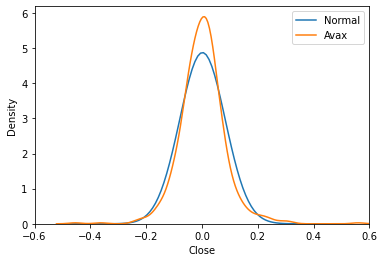

In [113]:
fig, ax = plt.subplots()
ax.plot(x, p, label= 'Normal')

sns.kdeplot(log_returns_avax, ax= ax, label = "Avax")
ax.legend()
plt.xlim(-0.6, 0.6)


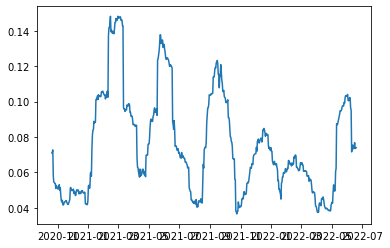

In [114]:
volatility_btc = avax_data["log_returns"].rolling(30).std()

fig, ax = plt.subplots()

ax.plot(volatility_btc)


In [152]:
mean = log_returns_avax.mean()
std = log_returns_avax.std()
min_ = log_returns_avax.min()
max_ = log_returns_avax.max()
print(f"The mean log_returns is {mean:.5f}, the std is {std:.5f} and we have {min_:.5f} as minimum and {max_:.5f} as maximum")
print(f"Using the Jarque-Bera test we can test for normality, here we have a p-value of {stats.jarque_bera(log_returns_avax)[1]} indicating that we surely reject that the returns follow a normal distribution")
stationarity = sm.tsa.stattools.adfuller(avax_data["Close"])
print(f"The ADF stat is {stationarity[0]} and critical values are for 5%: {stationarity[4]['5%']} and for 10%: {stationarity[4]['10%']}")

The mean log_returns is 0.00179, the std is 0.09351 and we have -0.70587 as minimum and 0.50240 as maximum
Using the Jarque-Bera test we can test for normality, here we have a p-value of 0.0 indicating that we surely reject that the returns follow a normal distribution
The ADF stat is -1.5464374684464548 and critical values are for 5%: -2.86613130039063 and for 10%: -2.569215089800357


### Fantom

In [122]:
ftm_Ticker = yf.Ticker("FTM-USD")
ftm_data = ftm_Ticker.history(period="max")

In [123]:
log_returns_ftm = np.log(ftm_data["Close"]/ftm_data["Close"].shift(1)).dropna()
ftm_data["log_returns"] = log_returns_ftm

In [124]:
m, std = stats.norm.fit(log_returns_ftm)
x = np.linspace(-0.5, 0.5, 100)
p = stats.norm.pdf(x, m, std)

(-0.6, 0.6)

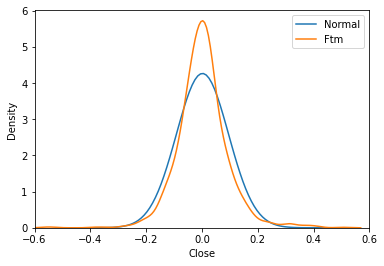

In [125]:
fig, ax = plt.subplots()
ax.plot(x, p, label= 'Normal')

sns.kdeplot(log_returns_ftm, ax= ax, label = "Ftm")
ax.legend()
plt.xlim(-0.6, 0.6)


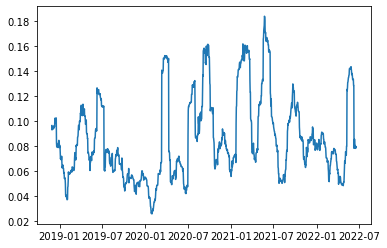

In [126]:
volatility_btc = ftm_data["log_returns"].rolling(30).std()

fig, ax = plt.subplots()

ax.plot(volatility_btc)


In [151]:
mean = log_returns_ftm.mean()
std = log_returns_ftm.std()
min_ = log_returns_ftm.min()
max_ = log_returns_ftm.max()
print(f"The mean log_returns is {mean:.5f}, the std is {std:.5f} and we have {min_:.5f} as minimum and {max_:.5f} as maximum")
stationarity = sm.tsa.stattools.adfuller(ftm_data["Close"])
print(f"Using the Jarque-Bera test we can test for normality, here we have a p-value of {stats.jarque_bera(log_returns_ftm)[1]} indicating that we surely reject that the returns follow a normal distribution")
print(f"The ADF stat is {stationarity[0]} and critical values are for 5%: {stationarity[4]['5%']} and for 10%: {stationarity[4]['10%']}")


The mean log_returns is 0.00036, the std is 0.01263 and we have -0.13149 as minimum and 0.13255 as maximum
Using the Jarque-Bera test we can test for normality, here we have a p-value of 0.0 indicating that we surely reject that the returns follow a normal distribution
The ADF stat is -1.86666483724792 and critical values are for 5%: -2.863752202145595 and for 10%: -2.5679477886494775


# Comparison with equity markets

### Let's compare this stats with the nasdaq, one of the most technological oriented indexes

In [131]:
nasdaq_Ticker = yf.Ticker("^IXIC")
nasdaq_data = nasdaq_Ticker.history(period="max")

In [132]:
log_returns_nasdaq = np.log(nasdaq_data["Close"]/nasdaq_data["Close"].shift(1)).dropna()
nasdaq_data["log_returns"] = log_returns_nasdaq

In [133]:
m, std = stats.norm.fit(log_returns_nasdaq)
x = np.linspace(-0.5, 0.5, 100)
p = stats.norm.pdf(x, m, std)

(-0.6, 0.6)

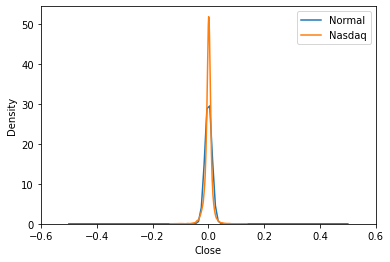

In [134]:
fig, ax = plt.subplots()
ax.plot(x, p, label= 'Normal')

sns.kdeplot(log_returns_ftm, ax= ax, label = "Nasdaq")
ax.legend()
plt.xlim(-0.6, 0.6)


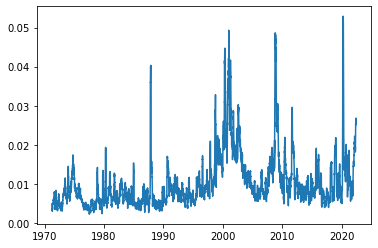

In [135]:
volatility_nasdaq = nasdaq_data["log_returns"].rolling(30).std()

fig, ax = plt.subplots()

ax.plot(volatility_nasdaq)


In [136]:
mean = log_returns_nasdaq.mean()
std = log_returns_nasdaq.std()
min_ = log_returns_nasdaq.min()
max_ = log_returns_nasdaq.max()
print(f"The mean returns is {mean}, the std is {std} and we have {min_} as minimum and {max_} as maximum")


The mean returns is 0.00036140319579314526, the std is 0.012631380977726613 and we have -0.13149154641354951 as minimum and 0.13254637605806302 as maximum
